<a href="https://colab.research.google.com/github/khushbuoswal/Decision_Tree_Algorithm/blob/main/Machine_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Name: Khushbu Oswal







Student ID: 14098887

The objective of this dataset was to create a predictive model that could determine whether an individual would be able to repay a loan or not. This prediction was to be made based on a set of features that were included in the dataset. In essence, the dataset aimed to establish a relationship between certain characteristics or attributes of individuals and their ability to meet their loan repayment obligations. By analyzing the provided features and their impact on loan repayment, the dataset sought to enable the development of a model that could make such predictions, which is valuable in assessing credit risk and making informed lending decisions.


Read the Dataset

In [ ]:
# Import necessary libraries for data manipulation and visualization
import numpy as np # Import NumPy for numerical operations
import pandas as pd # Import Pandas for data manipulation
from numpy import log2 as log # Import log function from NumPy and give it an alias 'log'
import seaborn as sns  # Import Seaborn for data visualization
import matplotlib.pyplot as plt # Import Matplotlib for plotting
from pandas.plotting import parallel_coordinates # Import parallel_coordinates for a specific plotting typ
from sklearn.model_selection import train_test_split # Import train_test_split for splitting data into train and test sets
from pprint import pprint # Import pprint for pretty printing of data
import random  # Import the random module for generating random numbers
from sklearn.metrics import accuracy_score # Import accuracy_score for measuring prediction accuracy
from sklearn.metrics import roc_curve, roc_auc_score # Import metrics for ROC curve analysis

# Define the path to the dataset CSV file on Google Drive
file_path = "https://raw.githubusercontent.com/khushbuoswal13/dates/main/KOSMO%20ML%20Assignment%20Dataset.csv"





# Define the separator used in the dataset CSV file (typically ',' for CSV)
separator = ','

# Specify the row number that contains the header information in the dataset
header_row = 0

# Read the dataset from the specified file path, using the specified separator and header row
loan_records = pd.read_csv(file_path, sep = ',' , header = header_row)


#Dataset is now stored in a pandas dataframe

# Display the loaded dataset in the Jupyter Notebook or Colab environment
loan_records


,1,2,3,4,sum,Unnamed: 5
0,201,10018,250,3046,13515.0,yes
1,205,10016,395,3044,13660.0,yes
2,257,10129,109,3251,13746.0,yes
3,246,10064,324,3137,13771.0,yes
4,117,10115,496,3094,13822.0,yes
5,406,10187,166,3068,13827.0,yes
6,461,10252,172,3062,13947.0,yes
7,158,10192,144,3469,13963.0,yes
8,136,10376,230,3223,13965.0,yes
9,194,10092,626,3083,13995.0,yes


In [ ]:
# Get the number of rows and columns in the 'loan_records' DataFrame and store them in the variables 'num_rows' and 'num_columns'
num_rows, num_columns = loan_records.shape

# Print the results
# Display the total number of rows in the dataset
print("Number of rows:", num_rows)
# Display the total number of columns (features) in the dataset
print("Number of columns:", num_columns)

Number of rows: 1000
Number of columns: 6


In [ ]:
# Rename columns in the 'loan_records' DataFrame using a dictionary to map old column names to new names

loan_records.rename(columns={
    '1': 'Initial_Payment_Amount',  # Rename column '1' to 'Initial_Payment_Amount'
    '2': 'Last_Payment_Amount',     # Rename column '2' to 'Last_Payment_Amount'
    '3': 'Applicant_Credit_Score',  # Rename column '3' to 'Applicant_Credit_Score'
    '4': 'House_Number_ID',         # Rename column '4' to 'House_Number_ID'
    'sum': 'Total_Payment_Amount',   # Rename column 'sum' to 'Total_Payment_Amount'
    'Unnamed: 5': 'Loan_Approval_Status' # Rename column 'Unnamed: 5' to 'Loan_Approval_Status'
}, inplace=True)


# Display the 'loan_records' DataFrame with the renamed columns

loan_records



,Initial_Payment_Amount,Last_Payment_Amount,Applicant_Credit_Score,House_Number_ID,Total_Payment_Amount,Loan_Approval_Status
0,201,10018,250,3046,13515.0,yes
1,205,10016,395,3044,13660.0,yes
2,257,10129,109,3251,13746.0,yes
3,246,10064,324,3137,13771.0,yes
4,117,10115,496,3094,13822.0,yes
5,406,10187,166,3068,13827.0,yes
6,461,10252,172,3062,13947.0,yes
7,158,10192,144,3469,13963.0,yes
8,136,10376,230,3223,13965.0,yes
9,194,10092,626,3083,13995.0,yes


Explanation:

loan_records.rename(columns={...}, inplace=True): This line of code renames the columns in the loan_records DataFrame. It uses a dictionary to map the old column names to new names. The columns parameter specifies the mapping, where each key is the old column name, and each value is the new column name. The inplace=True argument indicates that the changes should be applied directly to the DataFrame without creating a new DataFrame.

'# Display the 'loan_records' DataFrame with the renamed columns': This comment informs the reader that the next line of code is used to display the DataFrame with the updated column names. It's important to note that the column names have been changed according to the mapping provided in the rename function.

In [ ]:
# Retrieve and display the column names of the 'loan_records' DataFrame
# Retrieve and display the column names of the 'loan_records' DataFrame': This comment explains that the code is used to obtain and display the names
#of the columns in the 'loan_records' DataFrame. The columns attribute is used to retrieve the list of column names.
# The line loan_records.columns itself is a simple operation to access the column names of the DataFrame. This information is often useful to
# understand the structure of the dataset and to reference specific columns when performing data analysis or manipulation.
loan_records.columns

Index(['Initial_Payment_Amount', 'Last_Payment_Amount',
       'Applicant_Credit_Score', 'House_Number_ID', 'Total_Payment_Amount',
       'Loan_Approval_Status'],
      dtype='object')

In [ ]:
# Set option to display all columns and rows
pd.set_option('display.max_columns', None) # Set an option to display all columns
pd.set_option('display.max_rows', None) # Set an option to display all rows

# Create a reference 'inputs' to the 'loan_records' DataFrame
inputs = loan_records

# Display the entire DataFrame
print(inputs.to_string(index=False))

 Initial_Payment_Amount  Last_Payment_Amount  Applicant_Credit_Score  House_Number_ID  Total_Payment_Amount Loan_Approval_Status
                    201                10018                     250             3046               13515.0                  yes
                    205                10016                     395             3044               13660.0                  yes
                    257                10129                     109             3251               13746.0                  yes
                    246                10064                     324             3137               13771.0                  yes
                    117                10115                     496             3094               13822.0                  yes
                    406                10187                     166             3068               13827.0                  yes
                    461                10252                     172             3062            

In [ ]:
# Display information about the 'loan_records' DataFrame
loan_records.info()

# This comment explains that the line of code is used to retrieve and display information about the 'loan_records' DataFrame.
#The info() method provides a summary of the DataFrame, including details such as the number of non-null entries, data types, and memory usage.
# It's a useful way to quickly understand the structure and contents of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Initial_Payment_Amount  1000 non-null   int64  
 1   Last_Payment_Amount     1000 non-null   int64  
 2   Applicant_Credit_Score  1000 non-null   int64  
 3   House_Number_ID         1000 non-null   int64  
 4   Total_Payment_Amount    764 non-null    float64
 5   Loan_Approval_Status    1000 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 47.0+ KB


In [ ]:
# Generate summary statistics for the 'loan_records' DataFrame
loan_records.describe()

# This comment explains that the line of code is used to
# generate summary statistics for the 'loan_records' DataFrame. The describe() method provides statistical information
#about the numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, and maximum values.
#This summary can be helpful for getting a quick overview of the central tendencies and spread of the data.

,Initial_Payment_Amount,Last_Payment_Amount,Applicant_Credit_Score,House_Number_ID,Total_Payment_Amount
count,1000.00000,1000.00000,1000.000000,1000.000000,764.000000
mean,294.34300,12465.88400,528.042000,4027.011000,17349.469895
std,115.81539,1440.15617,259.796059,565.164179,1532.074131
min,100.00000,10005.00000,100.000000,3003.000000,13515.000000
25%,195.00000,11201.50000,302.000000,3545.000000,16284.750000
50%,289.50000,12450.00000,516.500000,4041.500000,17430.500000
75%,398.00000,13678.25000,753.500000,4507.000000,18485.750000
max,500.00000,14996.00000,997.000000,5000.000000,20737.000000


In [ ]:
# Display the first few rows of the 'loan_records' DataFrame
loan_records.head()

# This comment explains that the line of code is used to display the first few rows of the 'loan_records' DataFrame.
# The head() method is commonly used to inspect the top rows of a DataFrame and get a glimpse of the data.
# By default, it displays the first 5 rows, but you can specify a different number of rows to display by providing
# an argument to the head() method if needed.





,Initial_Payment_Amount,Last_Payment_Amount,Applicant_Credit_Score,House_Number_ID,Total_Payment_Amount,Loan_Approval_Status
0,201,10018,250,3046,13515.0,yes
1,205,10016,395,3044,13660.0,yes
2,257,10129,109,3251,13746.0,yes
3,246,10064,324,3137,13771.0,yes
4,117,10115,496,3094,13822.0,yes


In [ ]:
# Display the data types of each column in the 'loan_records' DataFrame
loan_records.dtypes

# This comment explains that the line of code is used to retrieve and display the data types of each column in the 'loan_records' DataFrame.
# The dtypes attribute provides information about whether each column contains integers, floating-point numbers, strings, or other data types.
# This is useful for understanding the data's format and how it should be treated in data analysis and processing.

Initial_Payment_Amount      int64
Last_Payment_Amount         int64
Applicant_Credit_Score      int64
House_Number_ID             int64
Total_Payment_Amount      float64
Loan_Approval_Status       object
dtype: object

In [ ]:
# Calculate start and end indices for the middle rows
start_index = 490 # Define the starting index
end_index = 509# Define the ending index

# Display the middle rows
loan_records.iloc[start_index:end_index+1]  # Adding 1 to end_index to include it in the range

# Calculate start and end indices for the middle rows: This comment indicates that the code is
# determining the start and end indices to specify a range of rows from the DataFrame.

#start_index = 490: Here, the start_index variable is assigned the value 490, which represents the index of the starting row.

# end_index = 509: Similarly, the end_index variable is assigned the value 509, which represents the index of the ending row.

# This comment explains that the purpose of the following line is to display a subset of rows from the 'loan_records' DataFrame, specifically the middle rows.
# The iloc method is used to select rows by their integer-based index. The range from start_index to end_index+1 is selected to include both
# the start and end rows in the displayed range.

,Initial_Payment_Amount,Last_Payment_Amount,Applicant_Credit_Score,House_Number_ID,Total_Payment_Amount,Loan_Approval_Status
490,134,12673,102,4429,17338.0,No
491,231,13698,185,3228,17342.0,No
492,287,12863,678,3516,17344.0,No
493,260,12478,417,4190,17345.0,No
494,444,13556,213,3137,17350.0,No
495,412,12697,797,3449,17355.0,No
496,107,12999,119,4136,17361.0,No
497,421,11805,957,4182,17365.0,No
498,110,12117,181,4961,17369.0,No
499,165,12821,888,3509,17383.0,No


Step 2 Cleaning Data set

In [ ]:
# Check for missing values in the entire DataFrame
missing_values = loan_records.isnull().sum()
print(missing_values)

#  This comment indicates that the code is designed
# to assess and report the presence of missing values (NaN or None) in the entire 'loan_records' DataFrame.

# missing_values = loan_records.isnull().sum(): In this line, the isnull() method is applied to the 'loan_records' DataFrame.
# This method identifies missing values in the DataFrame, and sum() is used to count the number of missing values in each column.
# The result is stored in the missing_values variable, which will be a Series showing the count of missing values for each column.

# print(missing_values): This line prints the missing_values Series, displaying the count of missing values for each column in the DataFrame.
# It provides valuable information about data quality and whether data imputation or cleaning is needed.






Initial_Payment_Amount      0
Last_Payment_Amount         0
Applicant_Credit_Score      0
House_Number_ID             0
Total_Payment_Amount      236
Loan_Approval_Status        0
dtype: int64


Data Preprocessing

"I have identified missing values in the 'Total_Payment_Amount' column. Therefore, I will remove the 'Total_Payment_Amount' column to eliminate unnecessary information and improve data cleanliness, as this attribute can be inferred from the provided data."

In [ ]:
# Drop the 'Total_Payment_Amount' column from the 'loan_records' DataFrame
loan_records.drop(columns=['Total_Payment_Amount'], inplace=True)

# Display the 'loan_records' DataFrame after dropping the column
loan_records

# This comment explains that the code intends to remove the 'Total_Payment_Amount' column from the 'loan_records' DataFrame.
# The column is being dropped to exclude it from further analysis or processing.

# loan_records.drop(columns=['Total_Payment_Amount'], inplace=True): In this line, the drop method is used to remove the specified column ('Total_Payment_Amount') from the DataFrame.
# The columns parameter indicates the target column to drop, and inplace=True ensures that the change is made directly to the original DataFrame, modifying it.

# Display the 'loan_records' DataFrame after dropping the column: This comment informs the reader that the next line displays the 'loan_records' DataFrame
# to show the result after dropping the specified column. The 'Total_Payment_Amount' column should no longer be present in the displayed DataFrame.


,Initial_Payment_Amount,Last_Payment_Amount,Applicant_Credit_Score,House_Number_ID,Loan_Approval_Status
0,201,10018,250,3046,yes
1,205,10016,395,3044,yes
2,257,10129,109,3251,yes
3,246,10064,324,3137,yes
4,117,10115,496,3094,yes
5,406,10187,166,3068,yes
6,461,10252,172,3062,yes
7,158,10192,144,3469,yes
8,136,10376,230,3223,yes
9,194,10092,626,3083,yes


"There is no need to convert the values to numeric since they are already in numeric form."






Exploratory Data Analysis

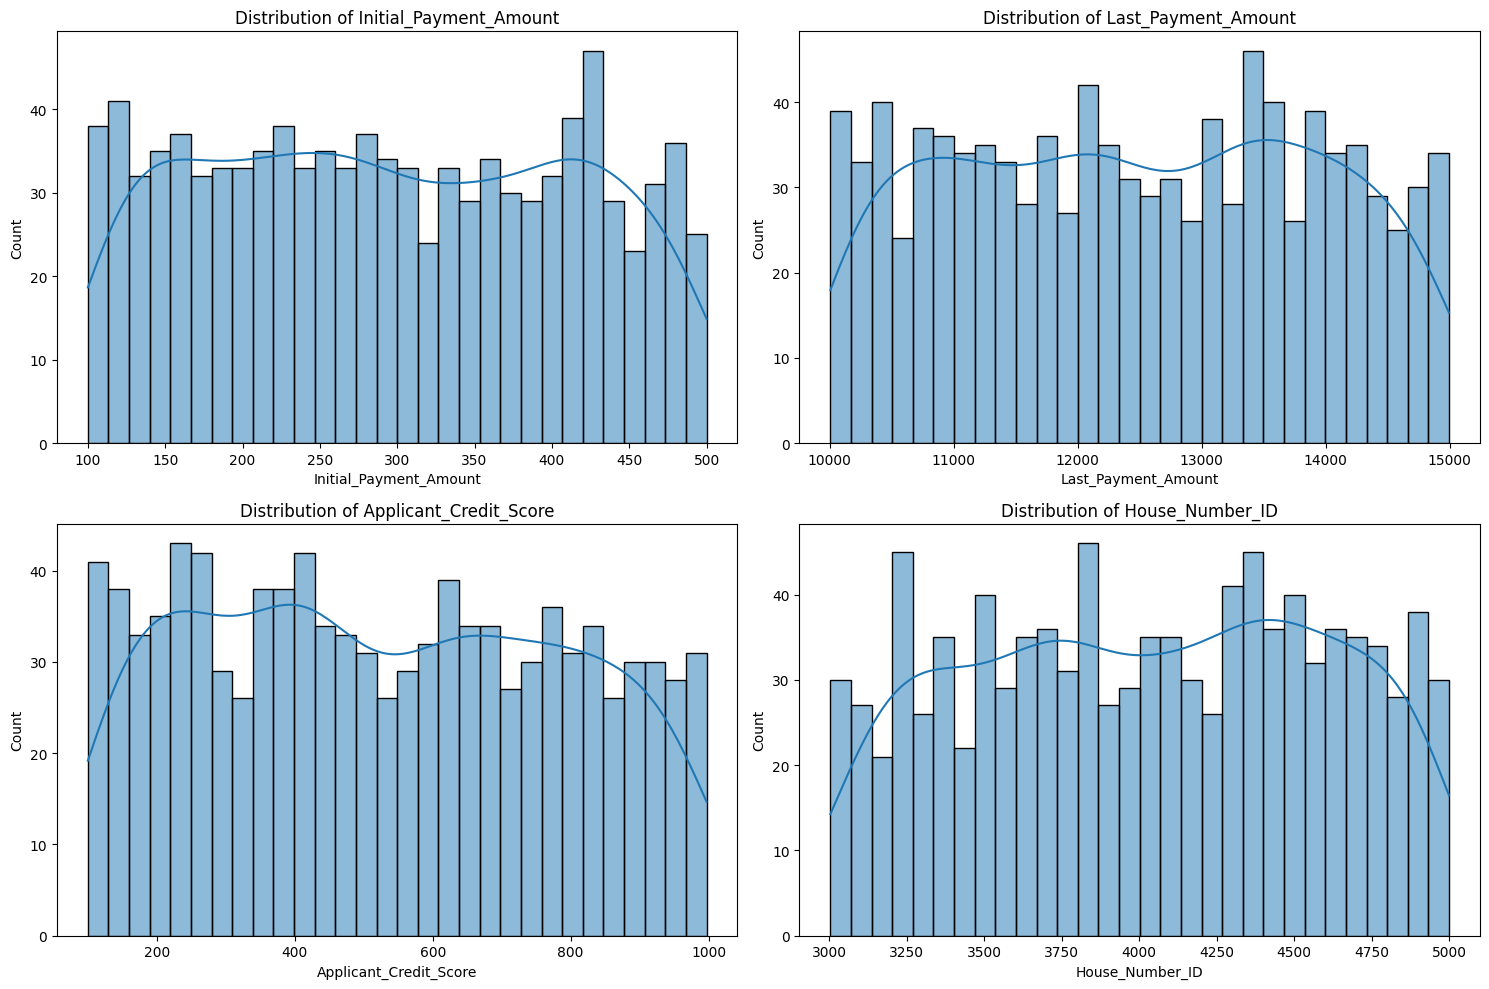

In [ ]:
# Define a list of features to explore in the 'loan_records' DataFrame
features_to_explore = ['Initial_Payment_Amount', 'Last_Payment_Amount', 'Applicant_Credit_Score', 'House_Number_ID']

# Create a figure for plotting with a specific size (15 units in width and 10 units in height)
plt.figure(figsize=(15, 10))

# Loop through the list of features for exploration
for i, feature in enumerate(features_to_explore, 1):
  # Create a subplot in a 2x2 grid, and select the current subplot
    plt.subplot(2, 2, i)

    # Create a histogram (histplot) of the current feature with 30 bins and a kernel density estimate (KDE)
    sns.histplot(loan_records[feature], bins=30, kde=True)  # Note the correction to kde=True

     # Set the title of the current subplot to describe the feature being explored
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()  # Fix the typo here from 'title_layout' to 'tight_layout'

# Display the entire figure with all subplots
plt.show()


#  This comment explains that a list of specific features to explore
# in the 'loan_records' DataFrame has been defined.

# Create a figure for plotting with a specific size (15 units in width and 10 units in height): This comment indicates that a figure for plotting
# is being created with a specified size of 15 units in width and 10 units in height. This larger figure size is intended to accommodate multiple subplots.

# The for loop is used to iterate through each feature in the features_to_explore list. This loop iterates over the features,
# and the code inside the loop is executed for each feature:

# plt.subplot(2, 2, i): This code creates a subplot in a 2x2 grid and selects the current subplot.
# The i variable represents the current iteration and determines the position of the subplot.

# sns.histplot(loan_records[feature], bins=30, kde=True): It generates a histogram (histplot) of the current feature,
# with 30 bins and a kernel density estimate (KDE) overlaid on the histogram.

# Bins: Bins represent intervals or ranges into which the data values are grouped in a histogram.
# Each bin contains data points falling within a specific range of values.
# In this code, bins=30 means that the histogram is divided into 30 equal-sized bins.
# This parameter controls the granularity of the histogram and how many bars (rectangles) you'll see in the plot.

# Kernel Density Estimate (KDE): A Kernel Density Estimate is a smoothed representation of the distribution of data.
# It provides an estimate of the probability density function of the underlying continuous distribution that the data might have been sampled from.
#  The KDE is an overlaid line or curve on the histogram, showing the shape of the data's distribution more smoothly.
# Setting kde=True in the code means that a KDE will be plotted on top of the histogram.

# plt.title(f'Distribution of {feature}'): This line sets the title of the current subplot to describe the distribution of the feature being explored.

# plt.tight_layout(): This ensures a tight layout to prevent any overlapping of subplots.

# Display the entire figure with all subplots: This comment explains that the entire figure with all subplots is displayed when the loop completes.
# This provides a clear visualization of the distributions of the selected features.





Initial Payment: At the initial payment stage, the count of individuals making payments appears to be relatively low. This could imply that fewer borrowers make the first payment compared to subsequent stages, indicating some level of attrition or selectivity in the early stages of the loan repayment process.

Final Payment: Similarly, the count of individuals making final payments is also observed to be on the lower side. This might suggest that a subset of borrowers successfully completes their loan payments, while others may default or follow different payment patterns.

Middle Range: The middle range, where counts are higher, suggests a concentration of borrowers making payments. This could represent a relatively stable phase in the loan repayment process, where a majority of borrowers are actively managing their payments.

<function matplotlib.pyplot.show(close=None, block=None)>

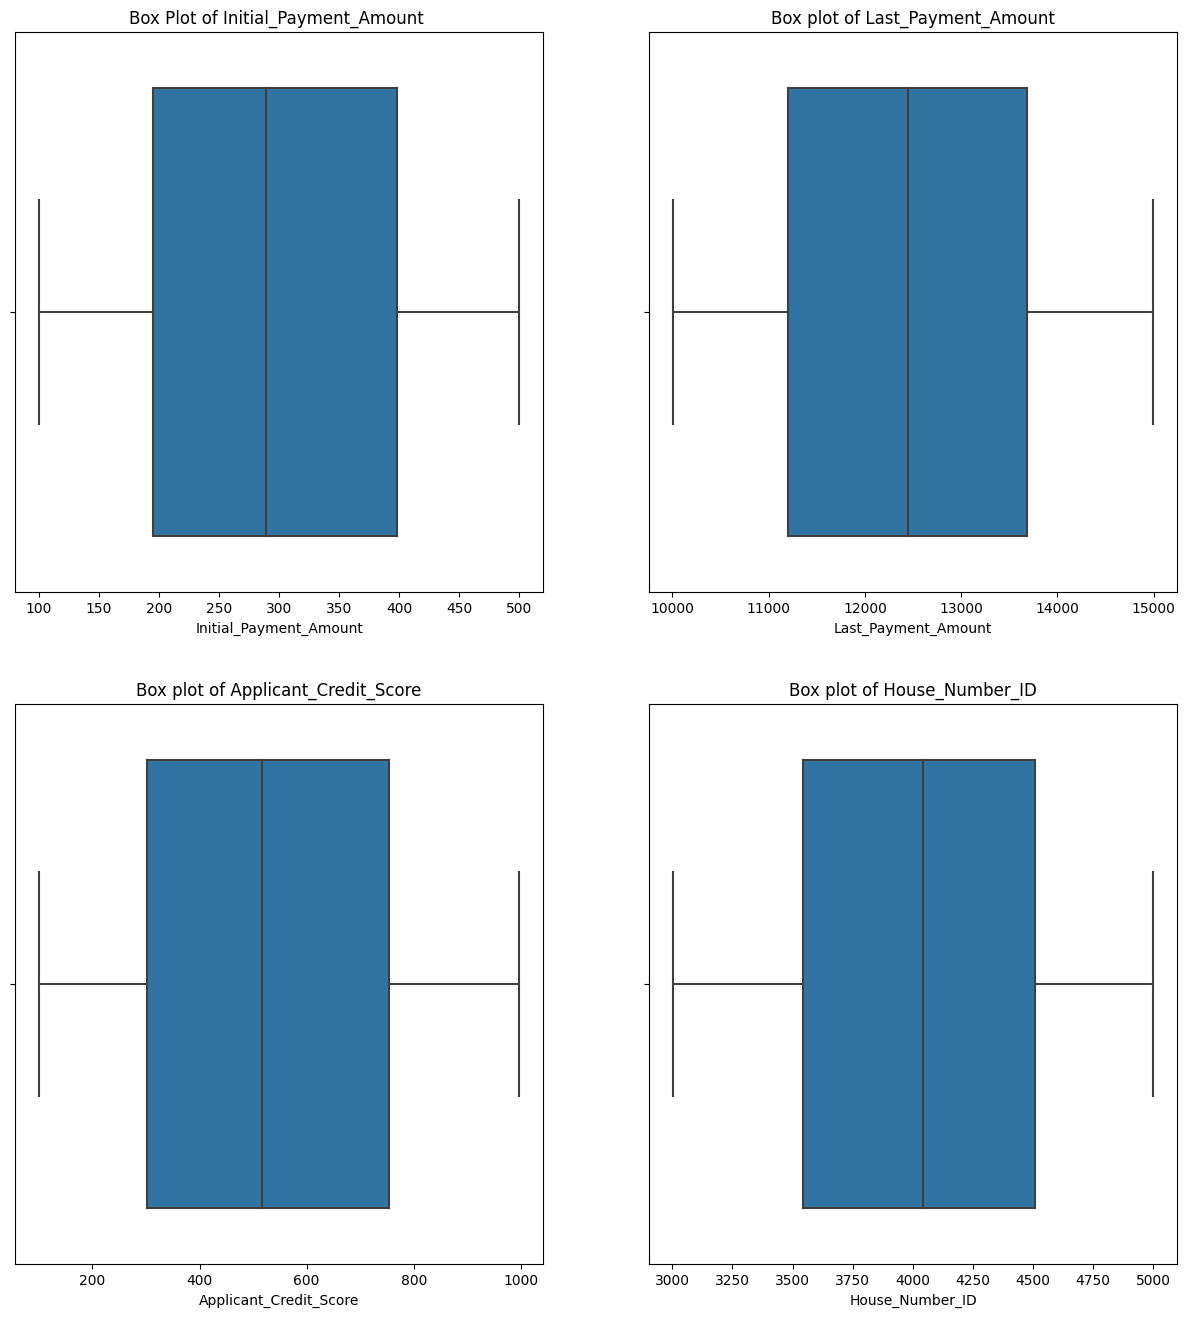

In [ ]:
# Create a figure for plotting with a specific size (15 units in width and 16 units in height)
plt.figure(figsize = (15,16))

# Subplot 1: Create a box plot for 'Initial_Payment_Amount'
plt.subplot(2, 2, 1 )
sns.boxplot(x = loan_records['Initial_Payment_Amount'])
plt.title('Box Plot of Initial_Payment_Amount ')

# Subplot 2: Create a box plot for 'Last_Payment_Amount'
plt.subplot(2, 2, 2)
sns.boxplot(x = loan_records [ 'Last_Payment_Amount'])
plt.title('Box plot of Last_Payment_Amount')

# Subplot 3: Create a box plot for 'Applicant_Credit_Score'
plt.subplot(2, 2, 3)
sns.boxplot(x = loan_records ['Applicant_Credit_Score'])
plt.title('Box plot of Applicant_Credit_Score')

# Subplot 4: Create a box plot for 'House_Number_ID'
plt.subplot(2, 2, 4)
sns.boxplot(x = loan_records ['House_Number_ID'])
plt.title('Box plot of House_Number_ID')

# Display the entire figure with all subplots
plt.show

#Explanation:

# Create a figure for plotting with a specific size (15 units in width and 16 units in height): This comment explains that a figure for plotting is being
# created with a specified size of 15 units in width and 16 units in height. The larger size allows for better visualization of the box plots.

# Subplots 1 to 4: Each of these comments corresponds to one of the four subplots created for box plots of different features. These subplots are organized in a 2x2 grid within the figure for side-by-side comparison.

# plt.subplot(2, 2, 1): This code creates the first subplot in the 2x2 grid. The numbers in the subplot function indicate the row and column where the subplot will be positioned.

# sns.boxplot(x=loan_records['Initial_Payment_Amount']): It creates a box plot for the 'Initial_Payment_Amount' feature.

# plt.title('Box Plot of Initial_Payment_Amount'): This sets the title for the subplot, describing what it represents.

# Display the entire figure with all subplots: This comment explains that the entire figure with all four subplots is displayed using plt.show(). This allows for the visual comparison of box plots for different features in one figure.

Initial Payment and Final Payment: The boxplots for both initial and final payments show that the data points are well-contained within the interquartile range (IQR), and there are no data points considered as outliers. This suggests that the spread of payment values for both the initial and final stages of the loan repayment does not exhibit extreme or unusual values. Borrowers seem to follow a consistent payment pattern within these stages.

Applicant Credit Score: The boxplot for applicant credit scores also does not indicate any outliers. This means that the credit scores of loan applicants are within a reasonable and expected range, and there are no exceptionally high or low scores that might be considered outliers.

<ipython-input-161-3d55d8bd23c4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_records.corr()


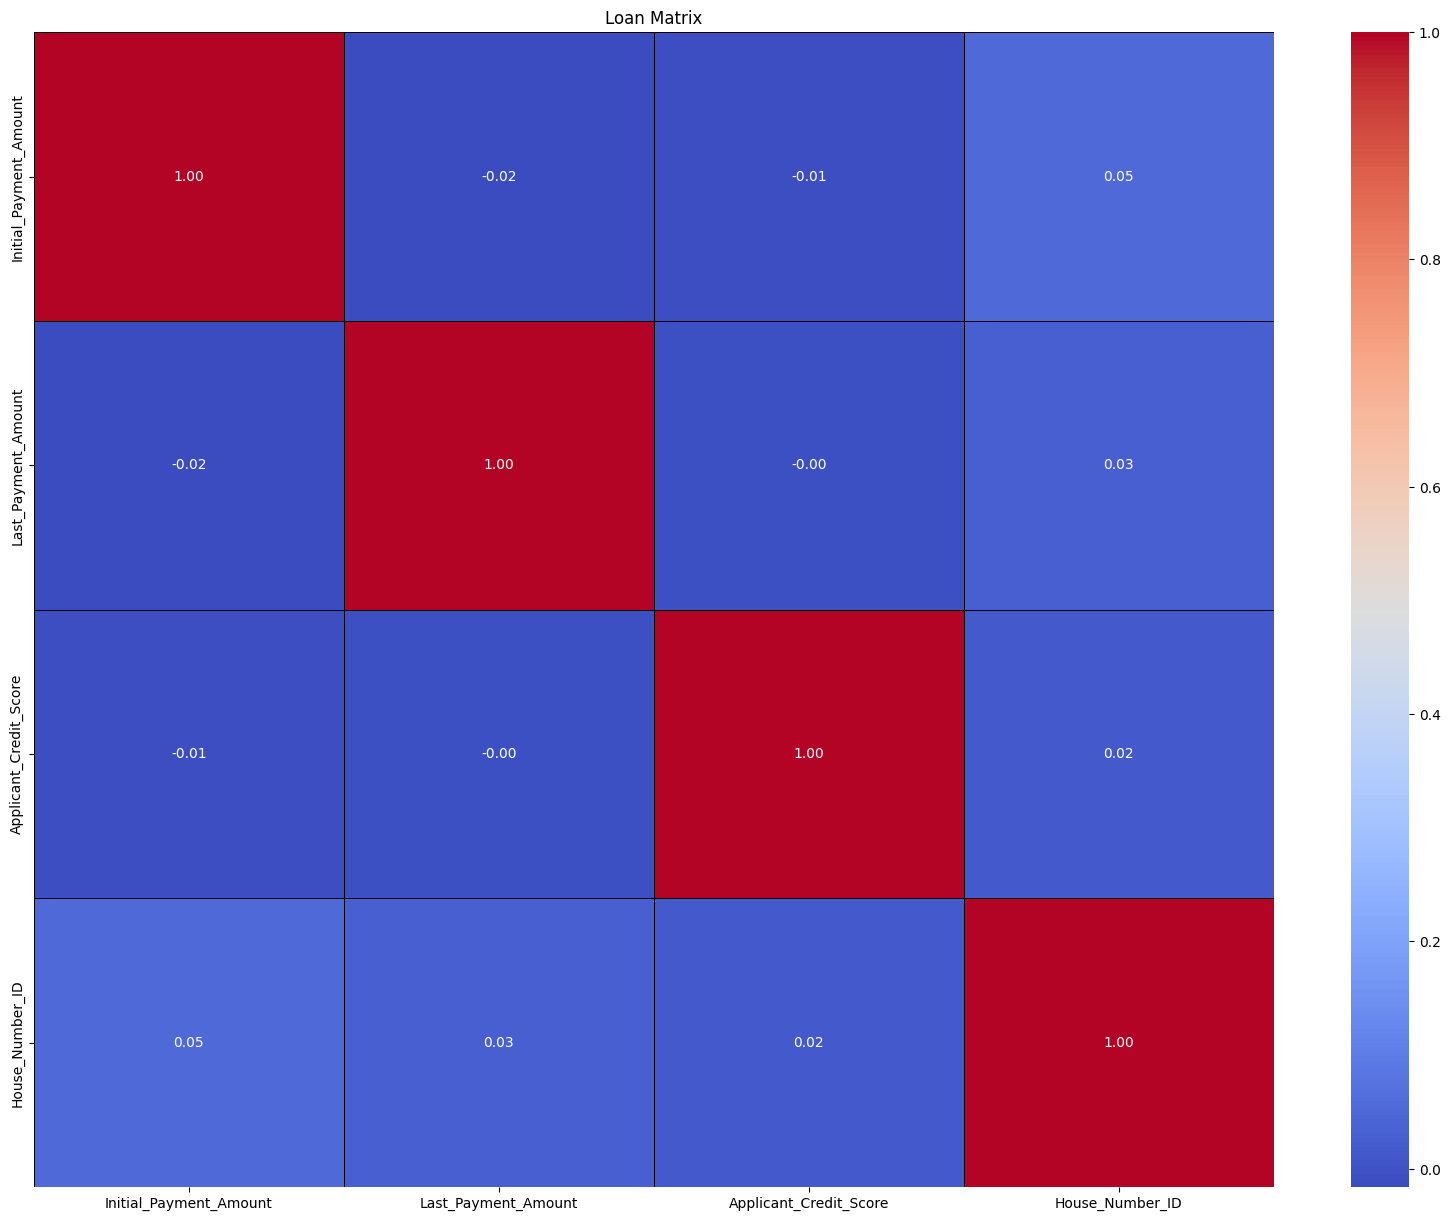

In [ ]:
# Calculate the correlation matrix for the loan_records DataFrame
correlation_matrix = loan_records.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 15)) #  # Set the figure size for the heatmap

# Use seaborn's heatmap function to create the visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor ='black')

# Set a title for the heatmap
plt.title('Loan Matrix')

# Show the heatmap
plt.show()


# Calculate the correlation matrix for the loan_records DataFrame: This comment indicates that the code calculates the correlation matrix for the 'loan_records' DataFrame. The correlation matrix quantifies the relationships between different numeric columns, revealing how they are positively or negatively correlated with each other.

# plt.figure(figsize=(20, 15)): This line sets the size of the figure (the plot's canvas) to control the dimensions of the heatmap. In this case, the figure is 20 units wide and 15 units tall.

# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black'):

# sns.heatmap(): This function from the seaborn library is used to create a heatmap.
# correlation_matrix: It's the correlation matrix previously calculated and passed to the heatmap function.
# annot=True: This argument adds numerical values to each cell in the heatmap, displaying the correlation coefficients.
# cmap='coolwarm': It sets the color map for the heatmap, where cool colors (e.g., blue) represent negative correlations, and warm colors (e.g., red) represent positive correlations.
# fmt=".2f": This specifies the format of the displayed values in the cells, with two decimal places.
# linewidths=0.5: It sets the width of lines between cells in the heatmap.
# linecolor='black': This specifies the color of the lines between cells.
# plt.title('Loan Matrix'): This line adds a title to the heatmap, which is displayed above the plot.

# plt.show(): Finally, this line displays the heatmap on the screen.




Initial_Payment_Amount vs. Last_Payment_Amount:

The correlation coefficient between 'Initial_Payment_Amount' and 'Last_Payment_Amount' is approximately -0.0161. This is a very weak negative correlation.
The negative sign suggests that there is a very slight tendency that as one of these values increases, the other decreases, but the correlation is so weak that it's not practically significant.
Initial_Payment_Amount vs. Applicant_Credit_Score:

The correlation coefficient between 'Initial_Payment_Amount' and 'Applicant_Credit_Score' is approximately -0.0118. This is also a very weak negative correlation.
Similarly, the negative sign suggests a very slight inverse relationship, but it's too weak to draw any practical conclusions from it.
Initial_Payment_Amount vs. House_Number_ID:

The correlation coefficient between 'Initial_Payment_Amount' and 'House_Number_ID' is approximately 0.0547. This is a very weak positive correlation.
The positive sign indicates a very slight tendency for these values to increase together, but the correlation is extremely weak.
Last_Payment_Amount vs. Applicant_Credit_Score:

The correlation coefficient between 'Last_Payment_Amount' and 'Applicant_Credit_Score' is approximately -0.0049. This is a very weak negative correlation.
Like the previous correlations, this suggests a very subtle inverse relationship, but the correlation is too weak to be practically significant.
Last_Payment_Amount vs. House_Number_ID:

The correlation coefficient between 'Last_Payment_Amount' and 'House_Number_ID' is approximately 0.0312. This is also a very weak positive correlation.
As with other correlations, this suggests a very slight tendency for these values to increase together, but the correlation is very weak.
Applicant_Credit_Score vs. House_Number_ID:

The correlation coefficient between 'Applicant_Credit_Score' and 'House_Number_ID' is approximately 0.0183. This is a very weak positive correlation.
Again, there is a very slight positive relationship, but the correlation is not strong enough to make meaningful conclusions.

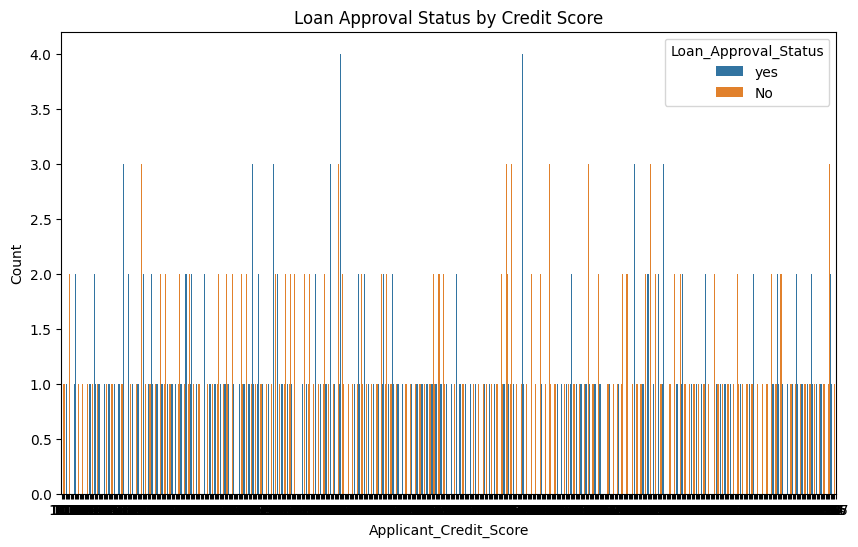

In [ ]:
# Create a count plot to visualize 'loan_approval_status' based on 'credit_score'
plt.figure(figsize=(10, 6)) # Set the figure size for the plot

# Use Seaborn's countplot function to create the visualization
sns.countplot(data=loan_records, x='Applicant_Credit_Score', hue='Loan_Approval_Status')

# Set a title for the plot
plt.title('Loan Approval Status by Credit Score')

# Label the x-axis
plt.xlabel('Applicant_Credit_Score')

# Label the y-axis
plt.ylabel('Count')

# Show the plot
plt.show()

# plt.figure(figsize=(10, 6)): This line sets the figure size for the plot, specifying its width and height. In this case, the figure is 10 units wide and 6 units tall.

# sns.countplot(data=loan_records, x='Applicant_Credit_Score', hue='Loan_Approval_Status'):

# sns.countplot(): This function from the Seaborn library is used to create a count plot.
# data=loan_records: It specifies the DataFrame 'loan_records' from which the data will be sourced for the plot.
# x='Applicant_Credit_Score': This indicates that the 'Applicant_Credit_Score' column will be plotted on the x-axis.
# hue='Loan_Approval_Status': This parameter defines that the 'Loan_Approval_Status' column will be used to distinguish different categories with different colors.
# plt.title('Loan Approval Status by Credit Score'): This line sets a title for the plot, which appears at the top of the visualization.

# plt.xlabel('Applicant_Credit_Score'): It labels the x-axis with 'Applicant_Credit_Score,' providing information about what the x-axis represents.

# plt.ylabel('Count'): This labels the y-axis with 'Count,' indicating that the y-axis represents the frequency or count of observations.

# plt.show(): Finally, this line displays the plot on the screen.




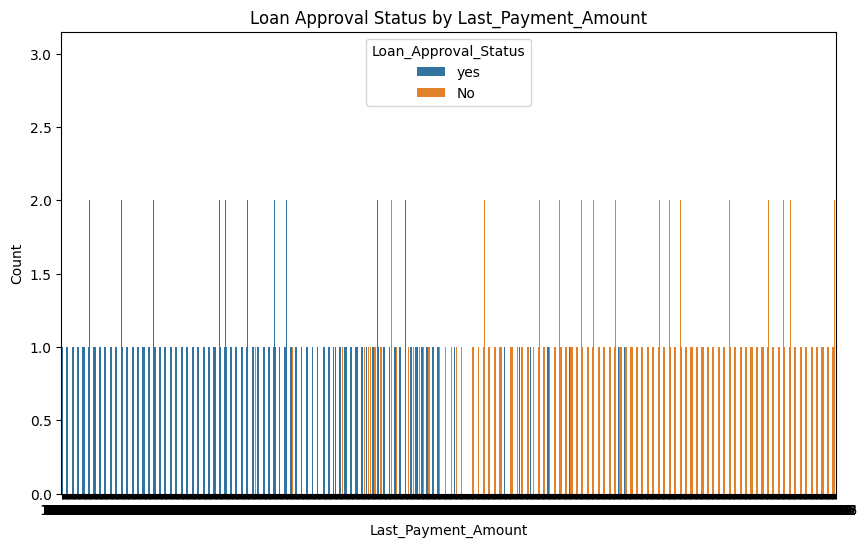

In [ ]:
# Create a count plot to visualize 'loan_approval_status' based on 'Last_Payment_Amount'
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_records, x='Last_Payment_Amount', hue='Loan_Approval_Status')
plt.title('Loan Approval Status by Last_Payment_Amount')
plt.xlabel('Last_Payment_Amount')
plt.ylabel('Count')
plt.show()

Lower Range of Last Payment Amounts: In the context of "Last Payment Amount," the lower range likely represents borrowers who have made relatively smaller final payments, which might suggest they are nearing the completion of their loan terms.

Loan Approval Status - "Yes": The dominance of "Yes" in this region signifies that a significant portion of borrowers who have made smaller final payments have been approved for their loans. This could be an encouraging sign, as it suggests that borrowers making smaller last payments are more likely to successfully complete their loans and receive approval.

Possible Factors: The higher frequency of "Yes" in this range could be influenced by various factors, such as a consistent payment history, creditworthiness, or adherence to loan terms. Lenders may be more inclined to approve loans for borrowers they perceive as less risky due to their history of reliable payments.


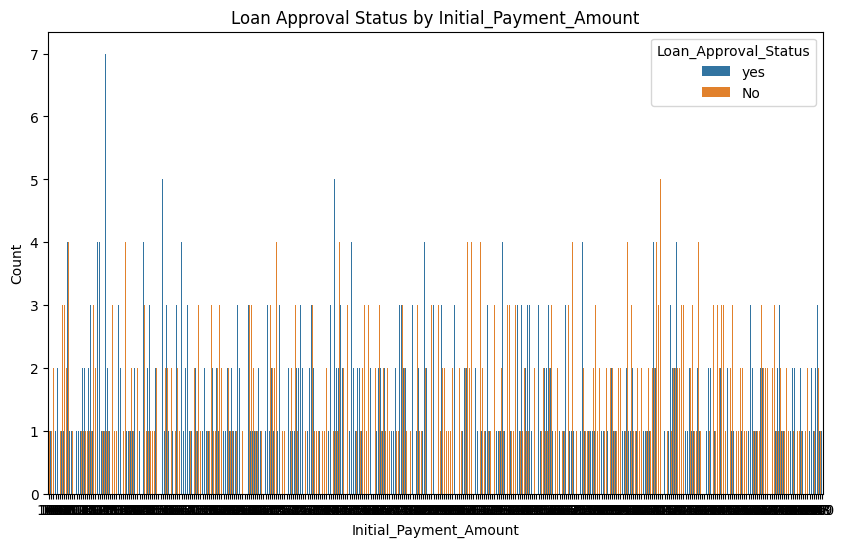

In [ ]:
# Create a count plot to visualize 'loan_approval_status' based on 'Last_Payment_Amount'
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_records, x='Initial_Payment_Amount', hue='Loan_Approval_Status')
plt.title('Loan Approval Status by Initial_Payment_Amount')
plt.xlabel('Initial_Payment_Amount')
plt.ylabel('Count')
plt.show()

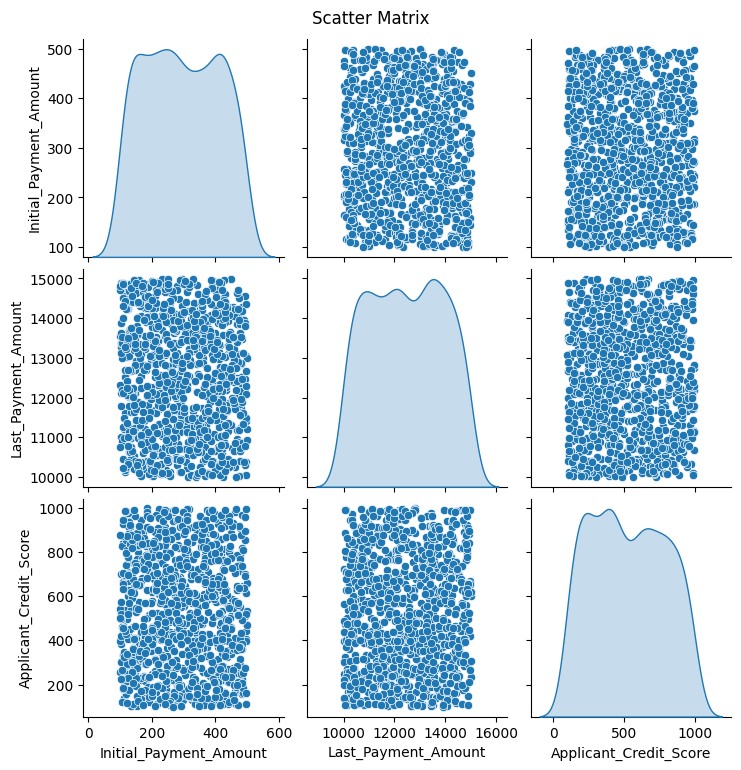

In [ ]:

# Assuming 'loan_records' is your DataFrame with multiple numeric columns
# For this example, let's consider columns 'initial_payment', 'last_payment', and 'credit_score'
columns_to_plot = ['Initial_Payment_Amount', 'Last_Payment_Amount', 'Applicant_Credit_Score']

# Create a pair plot (scatter matrix)
sns.pairplot(loan_records[columns_to_plot], diag_kind='kde', markers='o')

# Add titles to the plots
plt.suptitle("Scatter Matrix", y=1.02)

# Show the scatter matrix
plt.show()

# columns_to_plot: This list contains the column names from the 'loan_records' DataFrame that
# you want to include in the scatter matrix. In this example, it includes 'Initial_Payment_Amount,' 'Last_Payment_Amount,' and 'Applicant_Credit_Score.'

# sns.pairplot(loan_records[columns_to_plot], diag_kind='kde', markers='o'):

# sns.pairplot(): This function from Seaborn is used to create a pair plot, which is a grid of scatterplots for pairwise relationships between the specified columns.
# loan_records[columns_to_plot]: This extracts the subset of columns from the 'loan_records' DataFrame for which you want to create the pair plot.
# diag_kind='kde': It specifies that Kernel Density Estimation (KDE) plots should be displayed on the diagonal axes to visualize the distribution of each individual variable.
# markers='o': This parameter sets the markers to 'o' for the scatterplots.
# plt.suptitle("Scatter Matrix", y=1.02): This line adds a title to the scatter matrix plot. The y=1.02 parameter adjusts the vertical position of the title.

# plt.show(): Finally, this line displays the scatter matrix, allowing you to visualize the pairwise relationships and distributions of the selected columns.

Middle Range Concentration: The middle range on the scatter plot suggests that many data points are clustered within a specific range of values for "Initial Payment," "Last Payment," and "Applicant Credit Score." This might indicate a region where a significant number of borrowers fall within these attributes.

Initial Payment and Last Payment Extremes: The relatively sparse distribution of data points at the initial and last payment extremes implies that fewer borrowers make either very high or very low initial and final payments. This can have various implications:

Initial Payment: Few borrowers make exceptionally high initial payments, which could be related to early loan settlements or substantial down payments.




Last Payment: Similarly, fewer borrowers make very low final payments, which might reflect a successful loan repayment or early pay-off.





Applicant Credit Score: The concentration of data points in the middle range suggests that a significant number of applicants have credit scores within a certain range. This could indicate a common creditworthiness level among applicants.

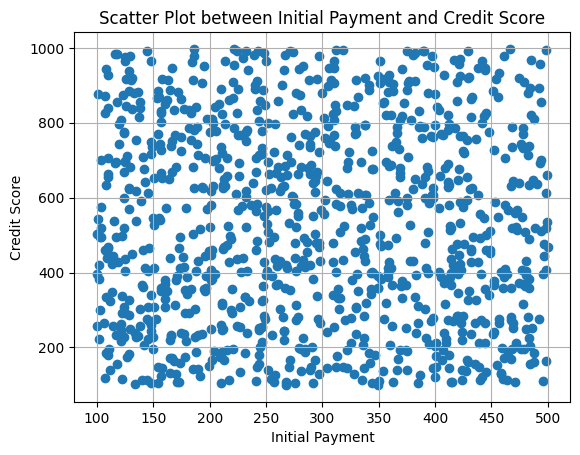

In [ ]:
plt.scatter(loan_records['Initial_Payment_Amount'], loan_records['Applicant_Credit_Score'])
plt.title('Scatter Plot between Initial Payment and Credit Score')
plt.xlabel('Initial Payment')
plt.ylabel('Credit Score')
plt.grid(True)  # Add grid lines if you like

# Show the scatter plot
plt.show()

I'll split the data into training and test sets

In [ ]:
def split_for_testing(loan_records, test_size):
    # Function to split the data into training and testing sets

    if isinstance(test_size, float):
        # Check if the provided 'test_size' is a float, representing a percentage
        test_size = round(test_size * len(loan_records))
        # Calculate the number of data points in the test set based on the percentage

    index = loan_records.index.tolist()
    # Create a list of indices for the entire dataset to use for random selection later

    test_index = random.sample(population=index, k=test_size)
    # Randomly select 'test_size' number of indices from the index list
    # This simulates a random sampling of data points for the test set

    test_set = loan_records.loc[test_index]
    # Create the test dataset by selecting rows with the randomly chosen indices

    train_set = loan_records.drop(test_index)
    # Create the training dataset by excluding the rows with the same indices as the test set

    return train_set, test_set
    # Return the training and testing datasets as the output of the function


  # def split_for_testing(loan_records, test_size):: This is the function definition. It defines a function named split_for_testing that takes two parameters: 'loan_records' (the dataset to be split) and 'test_size' (the proportion of data to allocate to the test set).

# if isinstance(test_size, float):: This conditional statement checks whether 'test_size' is a float value. If it is, it indicates that the user has provided the test size as a percentage (e.g., 0.3 for 30%). The code then calculates the absolute number of data points required for the test set based on this percentage by rounding 'test_size' times the total number of data points in 'loan_records.'

# index = loan_records.index.tolist(): This line creates a list of indices for the entire 'loan_records' dataset. These indices represent the rows of the dataset and will be used for random selection.

# test_index = random.sample(population=index, k=test_size): It randomly selects 'test_size' number of indices from the 'index' list. This process simulates a random sample of data points for the test set.

# test_set = loan_records.loc[test_index]: The test dataset is created by selecting the rows from 'loan_records' that correspond to the indices in 'test_index.'

# train_set = loan_records.drop(test_index): The training dataset is formed by excluding the rows with the same indices as those in 'test_index.' This ensures that data is not duplicated in the training set.

# return train_set, test_set: The function returns the training and testing datasets as its output.

In [ ]:
random.seed(0) # used in the generation of a pseudo-random encryption key.
# random.seed(0): This line sets a random seed to ensure that the random processes in the subsequent code are reproducible.
# The value '0' is an arbitrary choice and can be any non-negative integer. Setting a random seed allows you to obtain the same
# random selections when the code is run multiple times.
train_set, test_set=split_for_testing(loan_records, test_size=300)

# train_set, test_set = split_for_testing(loan_records, test_size=300): This line calls the split_for_testing function to split the
#  'loan_records' dataset. It allocates 300 data points (which is equivalent to 30% of the dataset) to the testing set and assigns the
# resulting training and testing sets to the variables train_set and test_set.
print("Training set shape:", train_set.shape)
print("Testing set shape:", test_set.shape)

# print("Training set shape:", train_set.shape): This line prints the shape (number of rows and columns) of the training set, allowing you to see the dimensions of the training dataset.

# print("Testing set shape:", test_set.shape): Similarly, this line prints the shape of the testing set, showing the dimensions of the testing dataset.
 #test on 30% of the dataset(can be repeated values)
#X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)- written earlier when using the library to split

Training set shape: (700, 5)
Testing set shape: (300, 5)


Here, the data points are randomized, and it's possible for data points to be selected more than once (i.e., repeated) during the process. This means that the same data point might appear in both the training and testing sets, allowing for potential duplications.

In [ ]:
test_set.head()

,Initial_Payment_Amount,Last_Payment_Amount,Applicant_Credit_Score,House_Number_ID,Loan_Approval_Status
864,474,13961,638,4090,No
394,167,11061,751,4836,yes
776,285,13351,770,4331,No
911,158,13693,917,4691,No
430,488,11618,811,4081,yes


In [ ]:
def group_data(loan_records):
# Function to group data based on a specific criterion
    label_column= loan_records[:, -1] #refer to last column- here it is result
    # Extract the last column from the 'loan_records' dataset, typically representing a label or result
    unique_classes, counts_unique_classes= np.unique(label_column, return_counts=True) #find unique values for result- Yes and No
# Find the unique values in the label column and their corresponding counts
    # This is a way to determine how many distinct classes or categories are present in the dataset
    i= counts_unique_classes.argmax() #Find maximum number of unique values. For result it would just be 2 classes- Yes and No
    # Find the index of the class with the maximum count
    # In this context, it's used to identify the class with the highest frequency in the label column

    result_data= unique_classes[i] #Classify data based on this criteria
# Assign the class with the highest frequency as the result or criterion for grouping
    return result_data
    # Return the determined result or criterion

Occurence of 'NO' was more

def group_data(loan_records):: This is the function definition. It defines a function named group_data that takes 'loan_records' as its parameter, which is typically a dataset.

label_column = loan_records[:, -1]: This line extracts the last column from the 'loan_records' dataset. In most datasets, the last column represents the labels or results of each data point.

unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True): This part of the code calculates the unique classes (labels) and their corresponding counts in the 'label_column.'

np.unique(label_column): This function from NumPy identifies all unique values present in the 'label_column.'
return_counts=True: By setting this parameter to 'True,' the function also returns the counts of each unique class.
i = counts_unique_classes.argmax(): The code determines which class (label) has the maximum count by finding the index with the highest count in the 'counts_unique_classes' array. In the context of loan approval, this would typically identify the more frequent class, which might be "Yes" or "No."

result_data = unique_classes[i]: The class with the highest count (the one identified in step 4) is assigned to the 'result_data' variable. This class serves as the criterion for grouping the data based on its frequency.








In [ ]:
def get_splits(loan_records): #find out the potential values we can split the data through

    _, columns= loan_records.shape #get columns from shape attribute by not providing row value
    possible_splits= {}
    # Initialize an empty dictionary to store potential split values for each feature
    for i in range(columns-1): # excluding result column
     # Iterate through the features, excluding the last column (result column)

        values= loan_records[:, i]
        # Extract the values of the current feature (column)

        possible_splits[i]= []
         # Create an empty list to store potential split values for the current feature

        unique_values=np.unique(values)
# Find the unique values in the current feature
        for j in range(len(unique_values)):
            if j!=0: #if there are no unique values, you break out of the inner for loop here

                previous=unique_values[j-1]
                current=unique_values[j]
                # Get the previous and current unique values

                split= (current + previous)/2  #split along a line halfway to differentiate 2 data points
                possible_splits[i].append(split)
                # Append the potential split value to the list for the current feature

    return possible_splits
     # Return a dictionary containing potential split values for each feature


# def get_splits(loan_records):: This is the function definition. It defines a function named get_splits that takes 'loan_records' as its parameter,
# representing the dataset.

# _, columns = loan_records.shape: This line extracts the number of columns (features) in the dataset using the shape attribute.
# It's important to determine how many features are present.

# possible_splits = {}: The function initializes an empty dictionary called 'possible_splits' to store potential split values for each feature.

# The code then iterates through the features (columns) of the dataset, excluding the last column, which is typically the
# result or label column. For each feature:

# It extracts the values of the current feature.
# Initializes an empty list to store potential split values for that feature.
# Finds the unique values present in the feature.
# Iterates through the unique values, excluding the first value.
# Calculates potential split values by taking the midpoint between the current and previous unique values.
# Appends these potential split values to the list for the current feature in the 'possible_splits' dictionary.
# return possible_splits: Finally, the function returns the 'possible_splits' dictionary, which contains potential split values for each feature.



In [ ]:
def split_data(loan_records, split_title, split_value): #this function simply splits data to values lesser than(or equal to) and those greater than
                                                     #the conditional value and then returns these
    split_column= loan_records[:, split_title]
    # Extract the values of the feature specified by 'split_title' (the split column)
    less_than= loan_records[split_column<=split_value]
    # Create a subset of the data where the values in the split column are less than or equal to the 'split_value'
    greater_than= loan_records[split_column>split_value]
 # Create a subset of the data where the values in the split column are greater than the 'split_value'
    return less_than, greater_than
 # Return the two subsets: 'less_than' and 'greater_than'



def split_data(loan_records, split_title, split_value):: This is the function definition. It defines a function named split_data that takes three parameters:

'loan_records': The dataset to be split.
'split_title': The index of the feature (column) by which to split the data.
'split_value': The value used as a threshold for the split.
split_column = loan_records[:, split_title]: This line extracts the values of the specified feature (split column) from the 'loan_records' dataset using the 'split_title' as the index.

less_than = loan_records[split_column <= split_value]: This step creates a subset of the data where the values in the split column are less than or equal to the 'split_value.' Data points that meet this condition are included in the 'less_than' subset.

greater_than = loan_records[split_column > split_value]: Here, a subset of the data is created where the values in the split column are greater than the 'split_value.' Data points that satisfy this condition are included in the 'greater_than' subset.

return less_than, greater_than: Finally, the function returns the two subsets: 'less_than' (data points with values less than or equal to the split value) and 'greater_than' (data points with values greater than the split value).

get_splits is meant for identifying potential split points, while split_data is intended for the actual splitting of data. Depending on the use case I used both of these functions in combination to achieve the desired data splitting and tree construction.

In [ ]:
def is_Pure(loan_records):

    label_column = loan_records[:, -1]
    # Extract the labels or classes from the last column of the dataset
    unique_classes = np.unique(label_column)
    # Find the unique classes present in the label column
    if len(unique_classes) == 1: #if there is only one unique class left, the data is pure
        return True
    else:
        return False


        #def is_Pure(loan_records):: This is the function definition. It defines a function named is_Pure that takes 'loan_records' as its parameter, representing the dataset.

#label_column = loan_records[:, -1]: This line extracts the labels or classes from the last column of the dataset. In many machine learning datasets, the last column typically contains the target variable or class labels.

# unique_classes = np.unique(label_column): The function uses the np.unique function from the NumPy library to identify the unique classes present in the label column.

# The code checks if the number of unique classes, obtained from unique_classes, is equal to 1 using the condition if len(unique_classes) == 1. If this condition is true, it means that there is only one unique class in the dataset. In such a case, the data is considered pure, and the function returns True. If there is more than one unique class, the function returns False.

Impure Node (Not Pure):

When a node is impure, meaning it contains multiple classes, I have to decide how to split it further. I can do this by a split value that minimizes impurity or maximizes information gain. The goal is to create child nodes that are purer than the parent node.
Common steps for handling an impure node:
I Calculate impurity measures such as entropy for the current node.

In [ ]:
def entropy_att(loan_records):
# Calculate the entropy for the target attribute (class labels).
    result_column= loan_records[:, -1]
    # Extract the class labels from the last column of the dataset.
    _, n= np.unique(result_column, return_counts=True)  #count the number of unique values
    probabilities= n/n.sum() # unique values/ total number of values
     # Calculate the probabilities of each class label occurring.
    entropy= sum(probabilities * -np.log2(probabilities)) # formula for entropy- summation
     # Calculate the entropy using the formula for entropy.

    return entropy

def entropy(less_than, greater_than ):
# Calculate the entropy for a dataset after a split into two subsets.

    n= len(less_than)+len(greater_than) #total values(denominator)
     # Calculate the total number of values (denominator).
    p_less_than= len(less_than)/n #probability for less than the split value
    p_greater_than= len(greater_than)/n #proabibility for greater than the split value
    entropy_d=  (p_less_than*entropy_att(less_than) + p_greater_than*entropy_att(greater_than)) # entropy for the dataset- or above the split

    return entropy_d


   # The entropy function calculates the entropy for a dataset that has been split into two subsets: "less than" and "greater than" a particular split value.
# It first calculates the total number of values (n) in both subsets, which serves as the denominator in the entropy calculation.
# Next, it calculates the probabilities of each subset occurring.
# The entropy_att function is called to calculate the entropy for each subset (the weighted average of the entropies of the subsets).
# The result is the entropy for the dataset after the split.

def best_split(loan_records, possible_splits): #this function selects the best column to split through and the best value for comparison

    entropy_d = 10106651651 #any high value for initial comparison
    for i in possible_splits:
        for j in possible_splits[i]:
          # Iterate through all possible splits defined in 'possible_splits.'

            data_below, data_above = split_data(loan_records, split_title=i, split_value=j)
            # Split the dataset into two subsets: 'data_below' and 'data_above' based on the current column and split value.

            entropy_now = entropy(data_below, data_above)
            # Calculate the entropy for the dataset after the current split.
            if entropy_now<=entropy_d:
               # Check if the entropy after the current split is less than or equal to the current minimum entropy.
                # If it is, update the minimum entropy, best column, and best value.
                entropy_d= entropy_now
                best_column= i
                best_value= j

    return best_column, best_value

#The purpose of this function is to find the best column and split value that minimizes entropy for a given dataset.
#It initializes entropy_d with an arbitrarily high value for initial comparison. The goal is to find a split that reduces entropy, so starting with a high value ensures that the first valid split will be selected.
# The function then iterates through all possible splits defined in possible_splits. These splits represent candidate columns and their potential split values.
# For each candidate split, the dataset is divided into two subsets: 'data_below' and 'data_above' using the split_data function.
# The entropy for the dataset after the split is calculated using the entropy function.
# If the calculated entropy is less than or equal to the current minimum entropy (entropy_d), it updates entropy_d, best_column, and best_value to reflect this better split.
# After evaluating all possible splits, the function returns the best column and value to split the dataset, based on the one that resulted in the minimum entropy.

First Case
Higher Entropy (Closer to 1):

It means that the dataset is more impure or disordered. In the context of decision trees, this suggests that the data is mixed and does not provide clear separation of classes.
A higher entropy value indicates that the data points within the dataset are spread across multiple classes, and it's more challenging to make accurate predictions based on this data.

Second Case
Lower Entropy (Closer to 0):

It means that the dataset is more pure or ordered. In this case, the data points within the dataset predominantly belong to a single class.
A lower entropy value indicates that the data is highly homogeneous and well-structured, making it easier to make predictions as the majority of data points fall into a single class.

The choice of using a decision tree to solve a dataset depends on several factors and considerations. Here are some reasons why I choose a decision tree for dataset:

Interpretability: Decision trees are easy to understand and interpret. The rules for making decisions are represented in a hierarchical, tree-like structure, making it clear how the model is making predictions.

Feature Importance: Decision trees can provide information about feature importance. You can see which features are the most relevant for making decisions at the top of the tree.

Handling Nonlinearity: Decision trees can handle both linear and nonlinear relationships in the data. They can be effective in situations where the relationships between features and the target variable are not linear.

No Assumptions about Data: Decision trees make no assumptions about the distribution of the data, which means they can work with a wide range of data types.

Handling Missing Data: Decision trees can handle missing data in a straightforward way. They can make decisions based on available data.

Scalability: Decision trees can handle large datasets, and they are relatively fast to build.

Ensemble Methods: Decision trees can be used as base models in ensemble methods like Random Forest and Gradient Boosting, which often lead to improved performance.

Binary and Multiclass Classification: Decision trees can be used for binary and multiclass classification problems.








In [ ]:
def decision_tree(loan_records,counter=0,min_samples=2,max_depth=20):
 # Decision tree building function with recursive calls
    if counter==0:
        global columns #we cannot access them if the variables are not global- error encountered and solved using stackoverflow and Youtube
        columns = loan_records.columns # Store the column names in the 'columns' variable.
        loan_records = loan_records.values #represent in 2d array format
    else:
        loan_records = loan_records

         # Stopping conditions for recursive tree building
    if (is_Pure(loan_records))or(len(loan_records)<min_samples)or(counter==max_depth): #any of the stopping conditions
     # Check stopping conditions for creating leaf nodes:
        # 1. If the data is pure (all samples belong to the same class).
        # 2. If the number of samples is below a minimum threshold (min_samples).
        # 3. If the maximum depth of the tree (max_depth) is reached.
        result_data= group_data(loan_records) # Get the class label for the leaf node.

        return result_data
    else:
        counter+= 1
        possible_splits= get_splits(loan_records)   #Use all the functions defined for functionality
        split_column, split_value=best_split(loan_records, possible_splits)
        data_below, data_above= split_data(loan_records, split_column, split_value)
        feature= columns[split_column]
        criteria="{}  <=  {}".format(feature, split_value) #placeholders placed to enter variable values in string- there is double space
                                                                  # so that the splitting of question doesn't split based on single space
                                                                  #otherwise the column titles would be split
        sub_tree={criteria: []} #initial subtree

        yes=decision_tree(data_below, counter, min_samples, max_depth)
        no=decision_tree(data_above, counter, min_samples, max_depth)
        if yes==no:
            sub_tree= yes #We don't need to repeat if the answers to the criteria are the same
        else:
            sub_tree[criteria].append(yes) #keep adding values to this subtree list based on the conditions meeting at each iteration
            sub_tree[criteria].append(no)

        return sub_tree

# The decision_tree function recursively constructs a decision tree based on provided stopping conditions and split criteria.
# It starts by checking stopping conditions for creating leaf nodes. If any of the conditions are met, it creates a leaf node with the majority class label.
# If the stopping conditions are not met, it identifies the best split feature and split value to divide the data into two subsets: "data_below" and "data_above."
# It keeps track of the depth of the tree using the "counter" variable and prevents the tree from growing too deep beyond the "max_depth."
# The function then generates a subtree based on the best split, and the process continues recursively for both "yes" and "no" branches.
# If the "yes" and "no" branches lead to the same result, only one branch is used. Otherwise, a subtree is created with both branches.
# The function returns the subtree for the current node in the decision tree.
#  this codeto be part of a decision tree construction process,  several other functions (such as is_Pure, group_data, get_splits, best_split, and split_data) are defined in code.


counter: This parameter is used to keep track of the recursion depth. It's not a default parameter, and I have set its default value to 0. The counter is used to limit the depth of the decision tree to prevent overfitting.
The function will stop building the tree when the counter reaches the specified max_depth or when certain stopping conditions are met.

min_samples: This parameter is used to set a minimum number of samples required to continue splitting the data. If the number of samples in the current node falls below min_samples, the algorithm will stop splitting and return the majority class in that node.
I've set a default value of 2, but it can be customized based on specific dataset and requirements.

max_depth: This parameter determines the maximum depth of the decision tree.
If the counter (recursion depth) reaches this value, the function will stop building the tree.
I've set a default value of 20, which can be adjusted based on the complexity of your problem and dataset.

In [ ]:
tree= decision_tree(train_set, max_depth=6) #modify the max_depth multiple times and check accuracy
                                                      #On doing this we obtain best accuracy(96%) 6 onwards
pprint(tree)


{'Last_Payment_Amount  <=  12336.0': [{'Last_Payment_Amount  <=  11343.5': ['yes',
                                                                            {'House_Number_ID  <=  4351.0': [{'House_Number_ID  <=  3936.0': ['yes',
                                                                                                                                              {'Applicant_Credit_Score  <=  725.5': ['yes',
                                                                                                                                                                                     {'Last_Payment_Amount  <=  11950.5': ['yes',
                                                                                                                                                                                                                           'No']}]}]},
                                                                                                             {'Applicant_Cr

In [ ]:
check = test_set.iloc[0] #test the first random one to check
# iloc[] allows to choose a cell of the dataset-
#it helps pick a value that belongs to a row/column from the data frame
check

Initial_Payment_Amount      474
Last_Payment_Amount       13961
Applicant_Credit_Score      638
House_Number_ID            4090
Loan_Approval_Status         No
Name: 864, dtype: object

In [ ]:
def group(check,tree): #this function returns the target value- predicted version
    criteria=list(tree.keys())[0]
    # Extract the decision criteria from the tree. Criteria is a string in the format: "feature <= split_value".
    feature, comparison_operator, split_value=criteria.split("  ")
    # Split the criteria string into feature, comparison operator, and split value.
    if check[feature]<=float(split_value):
       # Check if the feature value in the input data is less than or equal to the split value.
        answer= tree[criteria][0]
         # If true, move to the left branch (0) in the decision tree.
    else:
        answer= tree[criteria][1]
        # If false, move to the right branch (1) in the decision tree.
    if not isinstance(answer, dict):
       # If the answer is not a dictionary (i.e., it's a leaf node), return the answer.
        return answer
    else:
        tree_2= answer
         # If the answer is a dictionary, it means we need to continue down the tree.
        # Recursively call the 'group' function with the current subtree.
        return group(check,tree_2)
        # Recursively traverse the tree until a leaf node is reached, and return the leaf's target value.

Decision Tree Model:  Decision trees are structured as a tree-like flowchart where each node represents a decision based on a feature, and the branches lead to subsequent nodes or leaf nodes with predicted values.

Prediction: To apply the decision tree model to new, unseen data, I traverse the tree and make predictions. This is precisely what the group function does. It follows the branches of the tree based on the feature values in the check input and returns the predicted outcome.

Recursion: The function uses recursion to navigate the decision tree. This is because a decision tree can have multiple levels of branching and requires a recursive approach to traverse all the way to the leaf nodes, where the predictions are made.

Conditional Split: The code checks the input feature against the split value at each node to determine whether to move to the left or right branch. This process continues until a leaf node is reached.

In [ ]:
group(check, tree) #checking just one of the test rows

# group(check, tree): This is a function call. It calls the group function and passes two arguments to it: check and tree.
# The function is called to predict the outcome or target value for a specific set of features provided in the check dictionary
# using the decision tree model represented by the tree parameter.

# check: This variable likely contains a dictionary where the keys are feature names, and the values are the corresponding feature values.
# It represents the input features for which you want to make a prediction.

# tree: This parameter represents the decision tree model that has been previously trained on a dataset.
# The tree structure contains the criteria and branching decisions based on feature values that were learned during the training process.

'No'

This result indicates that, given the input features and the structure of the decision tree, the model has determined that the predicted outcome or class label for these features is "No." The decision tree model has processed the input features and followed the branching decisions defined in the tree to arrive at this prediction.

In a classification context, "No" typically represents one of the possible classes or categories that the model can assign to the input data. The specific meaning of "No" would depend on the problem and the dataset used to train the decision tree model.

In [ ]:
def accuracy_s(loan_records, tree):
    # Define a function named 'accuracy_s' to calculate the accuracy of a decision tree model on a dataset.
    # This function takes two parameters:
    # - 'loan_records': The dataset on which the model's accuracy is evaluated.
    # - 'tree': The decision tree model used for making predictions.

    loan_records["classification"] = loan_records.apply(group, axis=1, args=(tree,))
    # Apply the 'group' function to each row (data point) in the 'loan_records' DataFrame to make predictions.
    # The predictions are stored in a new column named 'classification.'

    loan_records["classification_c"] = loan_records["classification"] == loan_records["Loan_Approval_Status"]
    # Create a new column named 'classification_c' to check if the predicted classification ('classification')
    # matches the actual loan approval status ('Loan_Approval_Status') in the dataset.
    # If the prediction equals the actual status, the value will be 'True,' indicating a correct classification.

    accuracy = loan_records["classification_c"].mean()
    # Calculate the accuracy by taking the mean (average) of the 'classification_c' column.
    # The 'classification_c' column contains 'True' for correct predictions and 'False' for incorrect predictions.

    return accuracy
    # Return the calculated accuracy as a decimal value (e.g., 0.85 for 85% accuracy).

# The comments provide context and explanation for each part of the code:

# 1. Applying the 'group' function to make predictions for each data point in the 'loan_records' dataset.
#    - The 'group' function is applied using the 'apply' method with 'axis=1' to operate row-wise.
#    - The predictions are stored in a new column named 'classification.'

# 2. Creating a new column ('classification_c') to check if the predicted classification matches the actual loan approval status.
#    - This comparison results in 'True' for correct predictions and 'False' for incorrect predictions.

# 3. Calculating the accuracy by taking the mean of the 'classification_c' column.
#    - The mean represents the proportion of correct predictions in the dataset and serves as the accuracy score.

# 4. Returning the calculated accuracy as a decimal value.

# Overall, this function is used to assess the accuracy of a decision tree model by comparing its predictions to the actual values in the dataset.


Evaluation Metrics

1. Accuracy
2. Precision
3. Recall
4. F1 Score
5. ROC -AUC Curve
6. log-loss

In [ ]:
accuracy = accuracy_s(test_set, tree)
# Calculate the accuracy of a decision tree model on the 'test_set' dataset by calling the 'accuracy_s' function.
# - 'test_set': The dataset on which the model's accuracy is evaluated.
# - 'tree': The pre-trained decision tree model used for making predictions.

# The function 'accuracy_s' was previously defined to calculate the accuracy of a model, as explained in previous responses.

accuracy
# Display the calculated accuracy.

# Comments and explanation:

# 1. Calculating the accuracy of a decision tree model on a separate test dataset ('test_set').
#    - The 'test_set' contains data points that the model has not seen during training and is used to assess
#      the model's generalization performance on new, unseen data.

# 2. The 'accuracy_s' function is called with 'test_set' as input to evaluate how well the decision tree model
#    performs on this dataset.
#    - The 'tree' parameter represents the pre-trained decision tree model used for making predictions.

# 3. The calculated accuracy score is assigned to the variable 'accuracy.'
#    - The 'accuracy_s' function returns the accuracy as a decimal value.

# 4. Finally, the calculated accuracy is displayed, providing insight into how accurately the model predicts
#    the loan approval status for the test data.

# This code block is essential for evaluating and reporting the accuracy of the decision tree model on new,
# unseen data, which is a crucial step in assessing the model's performance and generalization capabilities.


0.96

I'll try to change some parameters to get the best accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Initialize and train the decision tree with different min_samples_split values
min_samples_split_values = [2, 5, 10, 20]  # adjust this list

for min_samples_split in min_samples_split_values:
    tree = decision_tree(train_set, min_samples=min_samples_split)
    accuracy = accuracy_s(test_set, tree)
    print(f"Accuracy for min_samples_split={min_samples_split}: {accuracy:.4f}")


#from sklearn.metrics import accuracy_score: This line imports the accuracy_score function from scikit-learn,
#which will be used to calculate the accuracy of the model's predictions.

#min_samples_split_values: This is a list of values to test for the min_samples_split parameter. min_samples_split is a
#hyperparameter that controls the minimum number of samples required to split an internal node in the decision tree.
#By testing different values, you can evaluate how this parameter affects the model's performance.

#for min_samples_split in min_samples_split_values:: This for loop iterates through the values in the min_samples_split_values list,
# allowing you to test the decision tree model with different values for min_samples_split.

#tree = decision_tree(train_set, min_samples=min_samples_split): Inside the loop, a decision tree is trained on the train_set dataset,
# and the min_samples_split hyperparameter is set to the current value from the loop. This line initializes and trains the decision tree
# with a specific min_samples_split value.

#accuracy = accuracy_s(test_set, tree): The accuracy_score function is used to calculate the accuracy of the model's predictions on the test_set.
# This line compares the model's predictions with the true labels in the test_set and computes the accuracy.

#print(f"Accuracy for min_samples_split={min_samples_split}: {accuracy:.4f}"): This line prints the accuracy result for the current
#min_samples_split value, providing a formatted output that includes the min_samples_split value and the corresponding accuracy score.

#The code effectively tests the decision tree model's performance with different values of min_samples_split and prints the accuracy for each value. This allows you to evaluate how the choice of this hyperparameter impacts the model's accuracy on the test dataset.







Accuracy for min_samples_split=2: 0.9600
Accuracy for min_samples_split=5: 0.9633
Accuracy for min_samples_split=10: 0.9600
Accuracy for min_samples_split=20: 0.9600


In [ ]:
from sklearn.metrics import accuracy_score

# Initialize and train the decision tree with different max_depth values
max_depth_values = [3, 5, 7, 10]  # adjust this list

for max_depth in max_depth_values:
    tree = decision_tree(train_set, max_depth=max_depth)
    accuracy = accuracy_s(test_set, tree)
    print(f"Accuracy for max_depth={max_depth}: {accuracy:.4f}")


Accuracy for max_depth=3: 0.9533
Accuracy for max_depth=5: 0.9567
Accuracy for max_depth=7: 0.9600
Accuracy for max_depth=10: 0.9600


FEATURE SELECTION

In [ ]:
# Import necessary libraries
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming you have a DataFrame 'loan_records' with features and a target variable

# Encode categorical target variable 'Loan_Approval_Status' to numeric
label_encoder = LabelEncoder()
loan_records['Loan_Approval_Status'] = label_encoder.fit_transform(loan_records['Loan_Approval_Status'])

# Separate features (X) and target (y)
X = loan_records.drop(columns=['Loan_Approval_Status'])
y = loan_records['Loan_Approval_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SelectKBest with chi-squared as the scoring function
# You can adjust 'k' (number of top features to select) based on your requirements
k_best = SelectKBest(score_func=chi2, k=3)  # Select the top 3 features

# Fit the feature selector on the training data
X_train_kbest = k_best.fit_transform(X_train, y_train)

# Transform the testing data with the same feature selector
X_test_kbest = k_best.transform(X_test)

# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)

# Print the names of the selected features
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)


# SelectKBest and chi2 from sklearn.feature_selection: These libraries are used for feature selection based on statistical tests.
# train_test_split from sklearn.model_selection: This is used to split the dataset into training and testing sets.
# LabelEncoder from sklearn.preprocessing: It is used to encode the categorical target variable as numeric.
# pandas is imported for data manipulation.
# Encode the categorical target variable:

# Use LabelEncoder to transform the 'Loan_Approval_Status' column from categorical (e.g., 'Yes' and 'No') to numeric (e.g., 1 and 0).
# Separate the features (X) and the target (y):

# X contains all the columns except 'Loan_Approval_Status'.
# y contains only the 'Loan_Approval_Status' column.
# Split the data into training and testing sets:

# train_test_split is used to divide the dataset into training and testing data, with 80% for training and 20% for testing.
# Initialize SelectKBest:

# Create a SelectKBest object with the chi-squared (chi2) statistical test as the scoring function.
# You specify k=3 to select the top 3 features, but you can adjust this number based on your requirements.
# Fit the feature selector on the training data:

# Use k_best.fit_transform to fit and transform the training data into the selected features based on the chi-squared test.
# Transform the testing data with the same feature selector:

# Use k_best.transform to transform the testing data into the selected features.
# Get the indices of the selected features:

#The get_support method is used to obtain the indices of the selected features.
#Print the names of the selected features:

Selected Features: Index(['Last_Payment_Amount', 'Applicant_Credit_Score', 'House_Number_ID'], dtype='object')


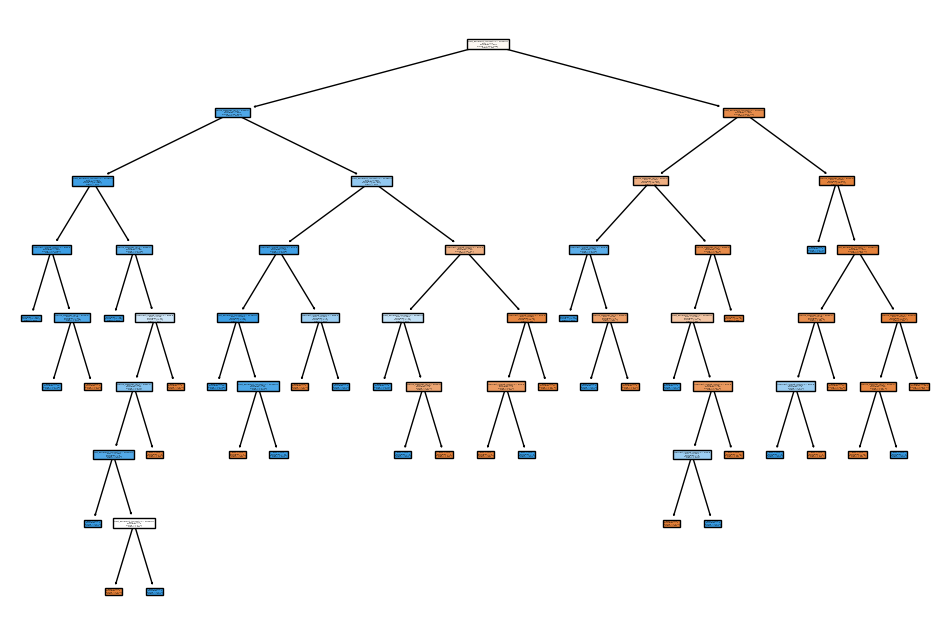

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'X_train_kbest' contains the training data with selected features
# 'y_train' contains the corresponding target labels

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier on the training data with selected features
clf.fit(X_train_kbest, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=selected_features, class_names=["No", "yes"])
plt.show()


The default values for a DecisionTreeClassifier in scikit-learn are as follows:

criterion: "gini" (criteria for quality of a split, which measures impurity)




splitter: "best" (strategy to choose the split at each node)





max_depth: None (unlimited depth)





min_samples_split: 2 (minimum number of samples required to split an internal node)





min_samples_leaf: 1 (minimum number of samples required to be in a leaf node)





min_weight_fraction_leaf: 0.0 (minimum weighted fraction of the sum total of weights)






max_features: None (number of features to consider for the best split)






random_state: None (controls randomness for reproducibility)


In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score

# Assuming 'X_test_kbest' contains the testing data with selected features
# 'y_test' contains the corresponding true labels

# Make predictions using the trained decision tree classifier
y_pred = clf.predict(X_test_kbest)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.95


After using the feature selection I got the accuracy of 0.95.

SMOTE

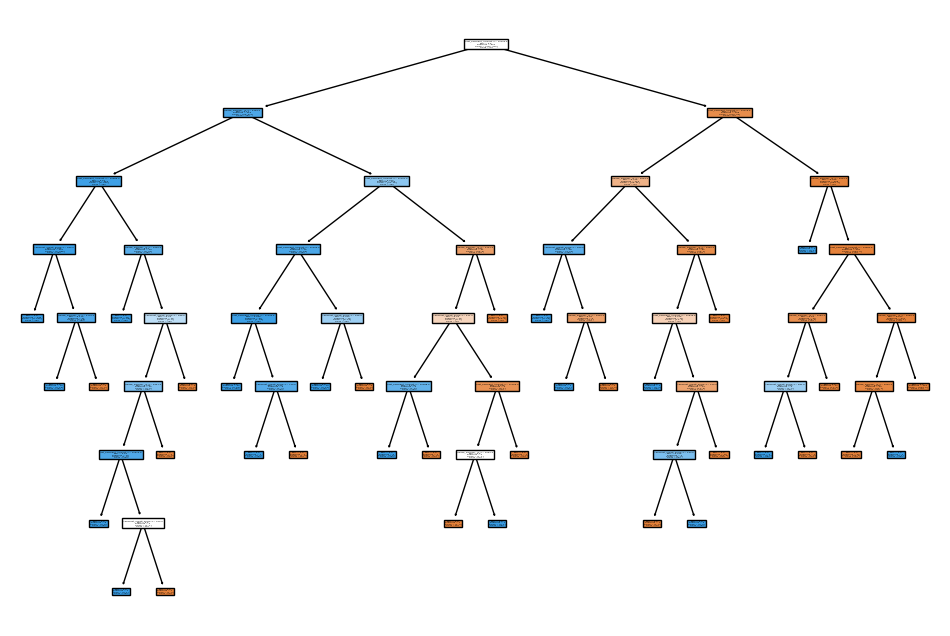

In [ ]:
from imblearn.over_sampling import SMOTE
# Import the SMOTE (Synthetic Minority Over-sampling Technique) class from the imbalanced-learn library.

smote = SMOTE(sampling_strategy='auto', random_state=42)
# Create an instance of the SMOTE class. The 'sampling_strategy' parameter is set to 'auto' to balance the class distribution.
# 'random_state' is set to ensure reproducibility.

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_kbest, y_train)
# Apply SMOTE to the training data. This generates synthetic samples for the minority class to balance the class distribution.
# 'X_train_kbest' contains the selected features for training, and 'y_train' is the corresponding target variable.

clf_smote = DecisionTreeClassifier()
# Create a new Decision Tree Classifier instance.

clf_smote.fit(X_train_resampled, y_train_resampled)
# Train the Decision Tree Classifier on the resampled training data.

plt.figure(figsize=(12, 8))
# Set the size of the figure for visualization.

plot_tree(clf_smote, filled=True, feature_names=selected_features, class_names=["No", "yes"])
# Visualize the decision tree. 'filled=True' fills the tree nodes with colors based on class distribution.
# 'feature_names' specifies the names of the selected features, and 'class_names' defines class labels.

plt.show()
# Display the decision tree plot.


In [ ]:
y_pred_smote = clf_smote.predict(X_test_kbest)
# Make predictions on the test data using the Decision Tree Classifier trained on the SMOTE-resampled data.

accuracy_smote = accuracy_score(y_test, y_pred_smote)
# Calculate the accuracy of the classifier on the test data by comparing the predicted labels (y_pred_smote) with the true labels (y_test).

print("Accuracy with SMOTE:", accuracy_smote)
# Print the accuracy score of the classifier after applying SMOTE to address class imbalance.



Accuracy with SMOTE: 0.955


After using the SMOTE I got the value of 0.955

It seems that using the SMOTE (Synthetic Minority Over-sampling Technique) function for handling imbalanced data is more effective than feature selection for this dataset.



SMOTE, which stands for "Synthetic Minority Over-sampling Technique," is an oversampling technique used in machine learning to address class imbalance in a dataset. Class imbalance occurs when one class of the target variable has significantly fewer instances than another class.

Used Parameter Optimization and Feature selection together but got an accuracy of 0.96

PARAMETER OPTIMIZATION

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],  # Test different impurity criteria
    'max_depth': [None, 10, 20, 30],  # Test different maximum depths of the tree
    'min_samples_split': [2, 5, 10, 20],  # Test different minimum samples for split
    'min_samples_leaf': [1, 2, 4]  # Test different minimum samples for leaf nodes
}

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_kbest, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a decision tree classifier with the best parameters
best_clf = DecisionTreeClassifier(**best_params, random_state=42)

# Fit the classifier on the training data
best_clf.fit(X_train_kbest, y_train)

# Make predictions using the best classifier
y_pred = best_clf.predict(X_test_kbest)

# Calculate the accuracy of the best classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Accuracy of Best Classifier:", accuracy)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy of Best Classifier: 0.97


Used parameter optimization and I achieved an accuracy value of 0.97.
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10

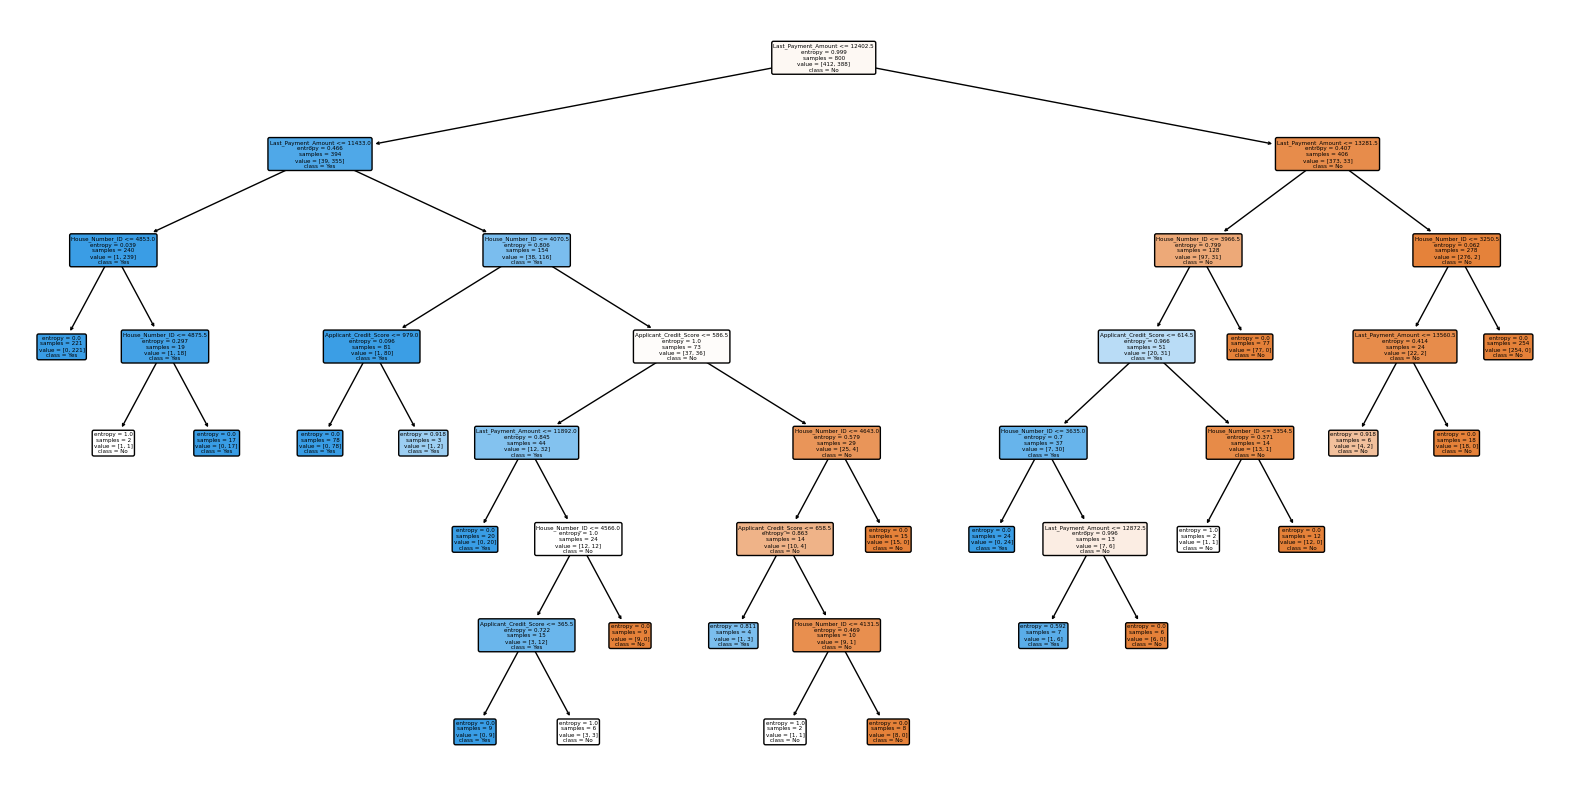

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Rest of the code for training the best decision tree classifier

# Visualize the best decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=selected_features, class_names=["No", "Yes"], filled=True, rounded=True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming 'best_clf' is the best decision tree classifier
# 'X_test_kbest' contains the testing data with selected features
# 'y_test' contains the true labels for the testing data

# Make predictions using the best classifier
y_pred = best_clf.predict(X_test_kbest)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       109
           1       0.98      0.96      0.97        91

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



Precision: Precision measures the ability of the classifier not to label a positive sample as negative. It's the ratio of true positives to the sum of true positives and false positives. For class 0, the precision is 0.96, meaning that when the classifier predicts class 0, it is correct 96% of the time. For class 1, the precision is 0.98, indicating a 98% precision for class 1 predictions.

Recall: Recall, also known as sensitivity or true positive rate, measures the ability of the classifier to find all the positive samples. It's the ratio of true positives to the sum of true positives and false negatives. For class 0, the recall is 0.98, meaning that the classifier correctly identifies 98% of the actual class 0 samples. For class 1, the recall is 0.96, indicating a 96% recall for class 1.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, especially useful when the dataset is imbalanced. For both class 0 and class 1, the F1-score is 0.97, indicating a high overall performance of the classifier in terms of precision and recall.

Support: Support represents the number of samples in each class. For class 0, there are 109 samples, and for class 1, there are 91 samples.

Accuracy: Accuracy measures the overall correctness of the classifier's predictions. It's the ratio of correctly predicted instances to the total instances. The overall accuracy is 97%, indicating that the classifier correctly predicts 97% of the samples.

Macro Avg: Macro average calculates the metrics independently for each class and then takes the unweighted mean. In this case, the macro average for precision, recall, and F1-score is 0.97.

Weighted Avg: Weighted average calculates the metrics for each class, but it takes into account the number of samples for each class. This is important in cases of class imbalance. The weighted average for precision, recall, and F1-score is 0.97.







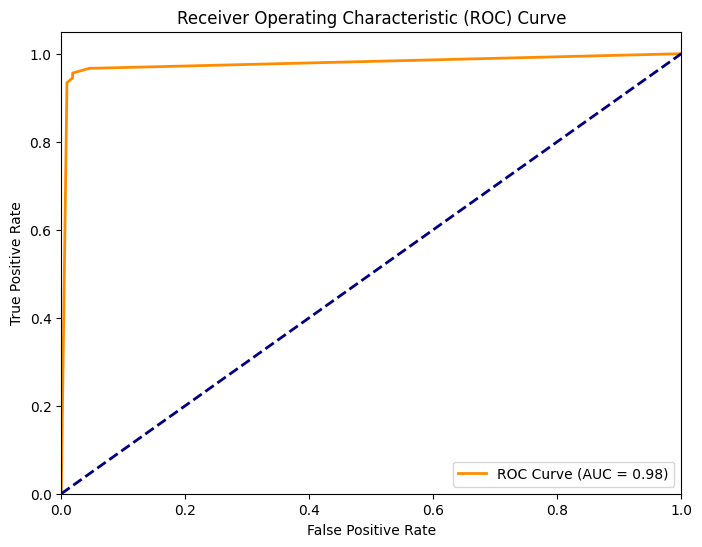

AUC: 0.98


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'best_clf' is the best decision tree classifier
# 'X_test_kbest' contains the testing data with selected features
# 'y_test' contains the true labels for the testing data

# Make predictions using the best classifier
y_prob = best_clf.predict_proba(X_test_kbest)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC
print(f"AUC: {auc:.2f}")



High Discriminatory Power: An AUC of 0.98 suggests that the model is very effective at distinguishing between the two classes (e.g., "Yes" and "No" or positive and negative outcomes). It means that the model has a high true positive rate (sensitivity) and a low false positive rate (1-specificity), resulting in an ROC curve that closely approaches the top-left corner of the graph.

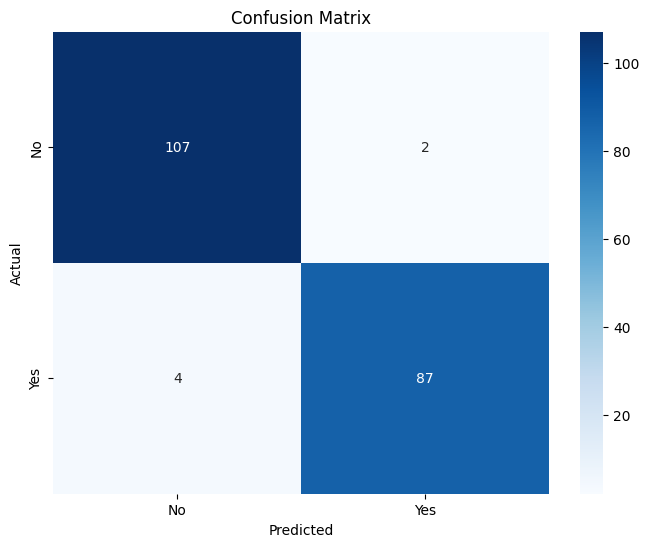

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'best_clf' is the best decision tree classifier
# 'X_test_kbest' contains the testing data with selected features
# 'y_test' contains the true labels for the testing data

# Make predictions using the best classifier
y_pred = best_clf.predict(X_test_kbest)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



True Positives (TP): 87
True Negatives (TN): 107
False Positives (FP): 2
False Negatives (FN): 4
Here's an explanation of what these values represent and what they mean in the context of a binary classification model:

True Positives (TP): These are the cases where the model correctly predicted the positive class. In your case, the model correctly predicted that the outcome was positive ("Yes") 87 times.

True Negatives (TN): These are the cases where the model correctly predicted the negative class. In your case, the model correctly predicted that the outcome was negative ("No") 107 times.

False Positives (FP): These are the cases where the model predicted the positive class, but it was actually negative. In your case, the model made this type of error 2 times.

False Negatives (FN): These are the cases where the model predicted the negative class, but it was actually positive. In your case, the model made this type of error 4 times.

Now, let's discuss the implications of these values:

The confusion matrix indicates that the model has high accuracy since both true positive and true negative values are relatively high.

The model has a low number of false positives (2), which is a good sign because it means that it doesn't mistakenly predict positive outcomes when they are not.

Similarly, the model has a low number of false negatives (4), which indicates that it doesn't miss positive outcomes very often.

The high true positive rate (87) and true negative rate (107) suggest that the model is effective at correctly classifying both positive and negative cases.

It's important to note that the interpretation of these results can vary depending on the specific problem you're working on. The importance of minimizing false positives or false negatives may depend on the context of your application.

In summary, the confusion matrix is a valuable tool for evaluating the performance of a binary classification model and understanding its strengths and weaknesses. The specific interpretation of the results should consider the domain of your problem and the associated costs of different types of errors.






In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' contains the true labels and 'y_pred' contains the predicted labels

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Display the confusion matrix values
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[107   2]
 [  4  87]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming 'X_train_kbest' contains the training data with selected features
# 'y_train' contains the corresponding target labels
# 'X_test_kbest' contains the test data with selected features
# 'y_test' contains the true labels for the test data

# Initialize and train the Gradient Boosting classifier
# Try different values of 'max_depth'
max_depth_values = [6, 7]  #  adjust this list

for max_depth in max_depth_values:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=max_depth, min_samples_split=2, min_samples_leaf=1, subsample=1.0, max_features=None)
    gb_clf.fit(X_train_kbest, y_train)

    # Calculate predictions on the test data
    y_pred_gb = gb_clf.predict(X_test_kbest)

    # Calculate accuracy for the Gradient Boosting classifier
    accuracy_gb = accuracy_score(y_test, y_pred_gb)

    print(f"Accuracy for max_depth={max_depth}: {accuracy_gb:.4f}")

Accuracy for max_depth=6: 0.9550
Accuracy for max_depth=7: 0.9450


Gradient boosting is not well-suited for this dataset.